In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re

In [2]:
df = pd.read_csv(r"C:\Users\GANGARAJU\Downloads\Cars24Analysis (1).csv")

In [5]:
df.sample(10)

Unnamed: 0  Year    Brand                                     Model  \
1601        1601  2020   Maruti                             S PRESSO VXI+   
3190        3190  2019   Maruti                   Baleno ALPHA PETROL 1.2   
711          711  2020   Maruti                    Baleno ZETA PETROL 1.2   
3402        3402  2017    Honda                    WR-V 1.2L I-VTEC VX MT   
875          875  2015  Hyundai                          i20 Active 1.2 S   
832          832  2022  Hyundai  GRAND I10 NIOS SPORTZ 1.2 KAPPA VTVT CNG   
3265        3265  2019    Honda                       Amaze 1.2L I-VTEC S   
379          379  2021  Hyundai       NEW I20 N LINE N6 1.0 TURBO GDI IMT   
1308        1308  2021   Maruti                   Baleno DELTA PETROL 1.2   
4036        4036  2018     Tata                           Tiago XT PETROL   

      Driven_Kms Fuel_Type Transmission_Type            Features       City  \
1601       20146    Petrol            Manual           Top Model  New Delhi   
3190       52201    Petrol            Manual           Top Model    Gurgaon   
711        14523    Petrol            Manual        Alloy Wheels     Mumbai   
3402       37935    Petrol            Manual           Top Model    Gurgaon   
875        97709    Petrol            Manual        Alloy Wheels     Mumbai   
832        11942       CNG            Manual        Alloy Wheels     Mumbai   
3265       37849    Petrol            Manual  Regularly Serviced    Gurgaon   
379        10542    Petrol            Manual  Regularly Serviced  Hyderabad   
1308       12577    Petrol            Manual  Regularly Serviced  New Delhi   
4036       48749    Petrol            Manual         City Driven    Gurgaon   

      Price(L) EMI(month)  
1601      4.03      7,879  
3190      6.48     12,674  
711       6.70     13,099  
3402      6.78     13,255  
875       4.32      8,446  
832       7.41     14,487  
3265      5.70     11,144  
379       8.88     16,902  
1308      7.06     13,802  
4036      3.97      7,769

# Data Cleaning

In [8]:
# Removing Unneccesary column

df.drop("Unnamed: 0", axis=1 , inplace=True)

In [10]:
# Removing comma from Emi column

df["EMI(month)"] = [i.replace(",","") for i in df["EMI(month)"]]

In [11]:
# Emi column convert into integer type
df["EMI(month)"] = df["EMI(month)"].astype("int")

In [12]:
df.head()

Year    Brand                               Model  Driven_Kms Fuel_Type  \
0  2018   Maruti                       Dzire VXI AMT       43091    Petrol   
1  2019  Hyundai               NEW SANTRO SPORTZ AMT       25159    Petrol   
2  2020     Ford  Ecosport TITANIUM + 1.5L PETROL AT       10885    Petrol   
3  2016   Maruti                     Celerio VXI AMT       53167    Petrol   
4  2015  Hyundai       Grand i10 ASTA 1.2 KAPPA VTVT       42198    Petrol   

  Transmission_Type       Features       City  Price(L)  EMI(month)  
0         Automatic  Safety Specs.  Hyderabad      6.16       12043  
1         Automatic  Spl. Reg. No.  Hyderabad      5.35       10459  
2         Automatic      Top Model  Hyderabad     10.08       19186  
3         Automatic   Low Run Cost  Hyderabad      4.13        8074  
4            Manual      Top Model  Hyderabad      4.51        8817

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4231 entries, 0 to 4230
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               4231 non-null   int64  
 1   Brand              4231 non-null   object 
 2   Model              4231 non-null   object 
 3   Driven_Kms         4231 non-null   int64  
 4   Fuel_Type          4231 non-null   object 
 5   Transmission_Type  4231 non-null   object 
 6   Features           4198 non-null   object 
 7   City               4231 non-null   object 
 8   Price(L)           4231 non-null   float64
 9   EMI(month)         4231 non-null   int32  
dtypes: float64(1), int32(1), int64(2), object(6)
memory usage: 314.1+ KB


In [14]:
# finding null values
df.isnull().sum()

Year                  0
Brand                 0
Model                 0
Driven_Kms            0
Fuel_Type             0
Transmission_Type     0
Features             33
City                  0
Price(L)              0
EMI(month)            0
dtype: int64

In [15]:
df["Features"] = df["Features"].fillna(0)

In [16]:
df.isnull().sum()

Year                 0
Brand                0
Model                0
Driven_Kms           0
Fuel_Type            0
Transmission_Type    0
Features             0
City                 0
Price(L)             0
EMI(month)           0
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4231 entries, 0 to 4230
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               4231 non-null   int64  
 1   Brand              4231 non-null   object 
 2   Model              4231 non-null   object 
 3   Driven_Kms         4231 non-null   int64  
 4   Fuel_Type          4231 non-null   object 
 5   Transmission_Type  4231 non-null   object 
 6   Features           4231 non-null   object 
 7   City               4231 non-null   object 
 8   Price(L)           4231 non-null   float64
 9   EMI(month)         4231 non-null   int32  
dtypes: float64(1), int32(1), int64(2), object(6)
memory usage: 314.1+ KB


# Outlier detection

<Axes: >

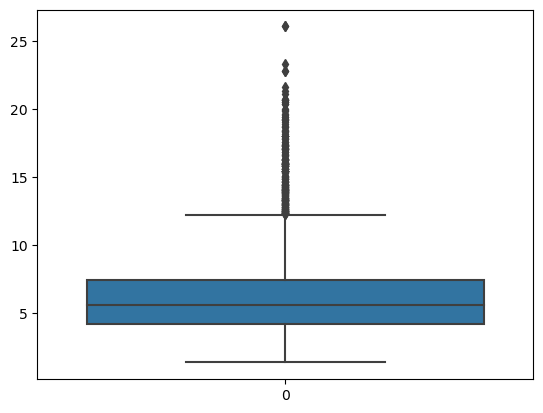

In [37]:
sns.boxplot(df["Price(L)"])

C:\Users\GANGARAJU\AppData\Local\Temp\ipykernel_12304\1562012887.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Price(L)"])


<Axes: xlabel='Price(L)', ylabel='Density'>

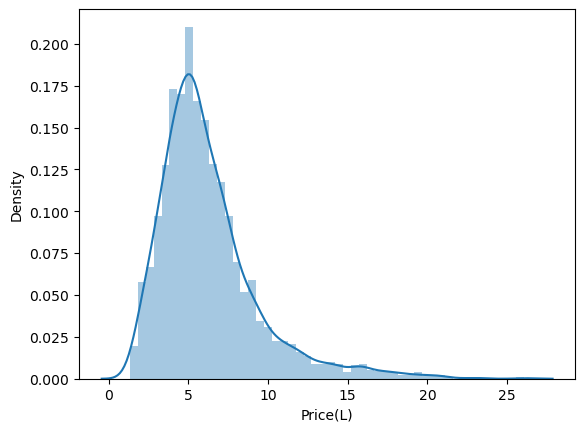

In [38]:
sns.distplot(df["Price(L)"])

In [27]:


q1 = df["Price(L)"].quantile(0.25)
q1

4.2

In [29]:
q2 = df["Price(L)"].quantile(0.50)
q2

5.54

In [30]:
q3 = df["Price(L)"].quantile(0.75)

In [31]:
q3

7.42

In [32]:
iqr = q3-q1
iqr

3.2199999999999998

In [33]:
lower_boundary = q1-(1.5*iqr)
lower_boundary

-0.6299999999999999

In [34]:
upper_boundary = q3+(1.5*iqr)
upper_boundary

12.25

In [39]:
# finding outliers

df[(df["Price(L)"] < lower_boundary) | (df["Price(L)"] > upper_boundary)]

Year     Brand                                 Model  Driven_Kms  \
6     2021       KIA      SONET GTX PLUS 1.0 DCT DUAL TONE       38579   
49    2019     Honda              Civic 1.8L I-VTEC ZX CVT       87136   
51    2023  Mahindra                   Thar LX P 2WD AT HT        4232   
57    2022    Maruti           XL6 ALPHA PLUS MT DUAL TONE       30516   
66    2020      Jeep           Compass LIMITED PLUS DIESEL       44321   
...    ...       ...                                   ...         ...   
4150  2022    Maruti                          XL6 ALPHA AT       29106   
4155  2021   Hyundai  Creta SX (O) 1.4 TURBO DCT DUAL TONE       32162   
4169  2019    Toyota                   Fortuner 2.8 4X2 MT       94020   
4214  2020        MG        HECTOR SMART HYBRID 1.5 PETROL       38343   
4215  2019        MG        HECTOR SHARP HYBRID 1.5 PETROL       62427   

     Fuel_Type Transmission_Type       Features       City  Price(L)  \
6       Petrol         Automatic        Sunroof  Hyderabad     12.48   
49      Petrol         Automatic              0  Hyderabad     16.08   
51      Petrol         Automatic   Alloy Wheels  Hyderabad     15.45   
57      Petrol            Manual      Top Model  Hyderabad     12.32   
66      Diesel            Manual        Sunroof  Hyderabad     16.26   
...        ...               ...            ...        ...       ...   
4150    Petrol         Automatic      Top Model    Gurgaon     13.20   
4155    Petrol         Automatic  Spl. Reg. No.    Gurgaon     15.78   
4169    Diesel            Manual  Spl. Reg. No.    Gurgaon     26.08   
4214    Petrol            Manual   Alloy Wheels    Gurgaon     13.03   
4215    Petrol            Manual  Spl. Reg. No.    Gurgaon     12.70   

      EMI(month)  
6          23755  
49         30607  
51         29408  
57         23450  
66         30949  
...          ...  
4150       25125  
4155       30036  
4169       56704  
4214       24801  
4215       24173  

[226 rows x 10 columns]

In [40]:
# find length of outliers

len(df[(df["Price(L)"] < lower_boundary) | (df["Price(L)"] > upper_boundary)])

226

In [41]:
# finding original data

len(df)-226

4005

In [42]:
# original data wiht outliers

df[(df["Price(L)"] > lower_boundary) & (df["Price(L)"] < upper_boundary)]

Year    Brand                               Model  Driven_Kms Fuel_Type  \
0     2018   Maruti                       Dzire VXI AMT       43091    Petrol   
1     2019  Hyundai               NEW SANTRO SPORTZ AMT       25159    Petrol   
2     2020     Ford  Ecosport TITANIUM + 1.5L PETROL AT       10885    Petrol   
3     2016   Maruti                     Celerio VXI AMT       53167    Petrol   
4     2015  Hyundai       Grand i10 ASTA 1.2 KAPPA VTVT       42198    Petrol   
...    ...      ...                                 ...         ...       ...   
4226  2018   Maruti          Baleno ZETA CVT PETROL 1.2       18707    Petrol   
4227  2019   Maruti              Baleno ZETA PETROL 1.2       34794    Petrol   
4228  2015  Hyundai                Elite i20 SPORTZ 1.2      119879    Petrol   
4229  2017    Honda                Amaze 1.2L I-VTEC VX       77979    Petrol   
4230  2018   Maruti             Baleno DELTA PETROL 1.2       36870    Petrol   

     Transmission_Type       Features       City  Price(L)  EMI(month)  
0            Automatic  Safety Specs.  Hyderabad      6.16       12043  
1            Automatic  Spl. Reg. No.  Hyderabad      5.35       10459  
2            Automatic      Top Model  Hyderabad     10.08       19186  
3            Automatic   Low Run Cost  Hyderabad      4.13        8074  
4               Manual      Top Model  Hyderabad      4.51        8817  
...                ...            ...        ...       ...         ...  
4226         Automatic   Alloy Wheels    Gurgaon      6.76       13222  
4227            Manual  Spl. Reg. No.    Gurgaon      6.19       12102  
4228            Manual  Safety Specs.    Gurgaon      4.24        9427  
4229            Manual      Top Model    Gurgaon      4.35        8504  
4230            Manual  Safety Specs.    Gurgaon      5.07        9912  

[4005 rows x 10 columns]

In [61]:
df2 =  df.to_csv('original_data.csv', index=False)

In [63]:
df

Year    Brand                               Model  Driven_Kms Fuel_Type  \
0     2018   Maruti                       Dzire VXI AMT       43091    Petrol   
1     2019  Hyundai               NEW SANTRO SPORTZ AMT       25159    Petrol   
2     2020     Ford  Ecosport TITANIUM + 1.5L PETROL AT       10885    Petrol   
3     2016   Maruti                     Celerio VXI AMT       53167    Petrol   
4     2015  Hyundai       Grand i10 ASTA 1.2 KAPPA VTVT       42198    Petrol   
...    ...      ...                                 ...         ...       ...   
4226  2018   Maruti          Baleno ZETA CVT PETROL 1.2       18707    Petrol   
4227  2019   Maruti              Baleno ZETA PETROL 1.2       34794    Petrol   
4228  2015  Hyundai                Elite i20 SPORTZ 1.2      119879    Petrol   
4229  2017    Honda                Amaze 1.2L I-VTEC VX       77979    Petrol   
4230  2018   Maruti             Baleno DELTA PETROL 1.2       36870    Petrol   

     Transmission_Type       Features       City  Price(L)  EMI(month)  
0            Automatic  Safety Specs.  Hyderabad      6.16       12043  
1            Automatic  Spl. Reg. No.  Hyderabad      5.35       10459  
2            Automatic      Top Model  Hyderabad     10.08       19186  
3            Automatic   Low Run Cost  Hyderabad      4.13        8074  
4               Manual      Top Model  Hyderabad      4.51        8817  
...                ...            ...        ...       ...         ...  
4226         Automatic   Alloy Wheels    Gurgaon      6.76       13222  
4227            Manual  Spl. Reg. No.    Gurgaon      6.19       12102  
4228            Manual  Safety Specs.    Gurgaon      4.24        9427  
4229            Manual      Top Model    Gurgaon      4.35        8504  
4230            Manual  Safety Specs.    Gurgaon      5.07        9912  

[4231 rows x 10 columns]

# Analysis

In [67]:
df.columns

Index(['Year', 'Brand', 'Model', 'Driven_Kms', 'Fuel_Type',
       'Transmission_Type', 'Features', 'City', 'Price(L)', 'EMI(month)'],
      dtype='object')

In [68]:
df["Price(L)"].max()

26.08

In [69]:
df[(df["Price(L)"]==26.08)]

Year   Brand                Model  Driven_Kms Fuel_Type  \
1976  2019  Toyota  Fortuner 2.8 4X2 MT       94020    Diesel   
4169  2019  Toyota  Fortuner 2.8 4X2 MT       94020    Diesel   

     Transmission_Type       Features       City  Price(L)  EMI(month)  
1976            Manual  Spl. Reg. No.  New Delhi     26.08       56704  
4169            Manual  Spl. Reg. No.    Gurgaon     26.08       56704

In [70]:
df["Price(L)"].min()

1.34

In [71]:
df[(df["Price(L)"]==1.34)]

Year    Brand            Model  Driven_Kms Fuel_Type Transmission_Type  \
1530  2010  Hyundai  Santro Xing GLS       55293    Petrol            Manual   
3851  2010  Hyundai  Santro Xing GLS       55293    Petrol            Manual   

       Features       City  Price(L)  EMI(month)  
1530  Top Model  New Delhi      1.34       11906  
3851  Top Model    Gurgaon      1.34       11906

In [72]:
df["Price(L)"].mean()

6.25049160954857

In [73]:
df["Brand"].mode()

0    Maruti
Name: Brand, dtype: object

In [74]:
df["Model"].mode()

0    Baleno DELTA PETROL 1.2
Name: Model, dtype: object

In [75]:
df["Driven_Kms"].max()

148459

In [76]:
df[(df["Driven_Kms"]==148459)]

Year   Brand        Model  Driven_Kms Fuel_Type Transmission_Type  \
2343  2015  Maruti  Celerio ZXI      148459    Petrol            Manual   

       Features       City  Price(L)  EMI(month)  
2343  Top Model  Bangalore      3.25        7218

In [77]:
df["Driven_Kms"].min()

476

In [78]:
df[(df["Driven_Kms"]==476)]

Year   Brand          Model  Driven_Kms Fuel_Type Transmission_Type  \
1182  2020  Maruti  S PRESSO VXI+         476    Petrol            Manual   
3797  2020  Maruti  S PRESSO VXI+         476    Petrol            Manual   

       Features       City  Price(L)  EMI(month)  
1182  Top Model  New Delhi      4.62        9032  
3797  Top Model    Gurgaon      4.62        9032

In [79]:
df["Driven_Kms"].mean()

50650.806665091

# univariate analysis

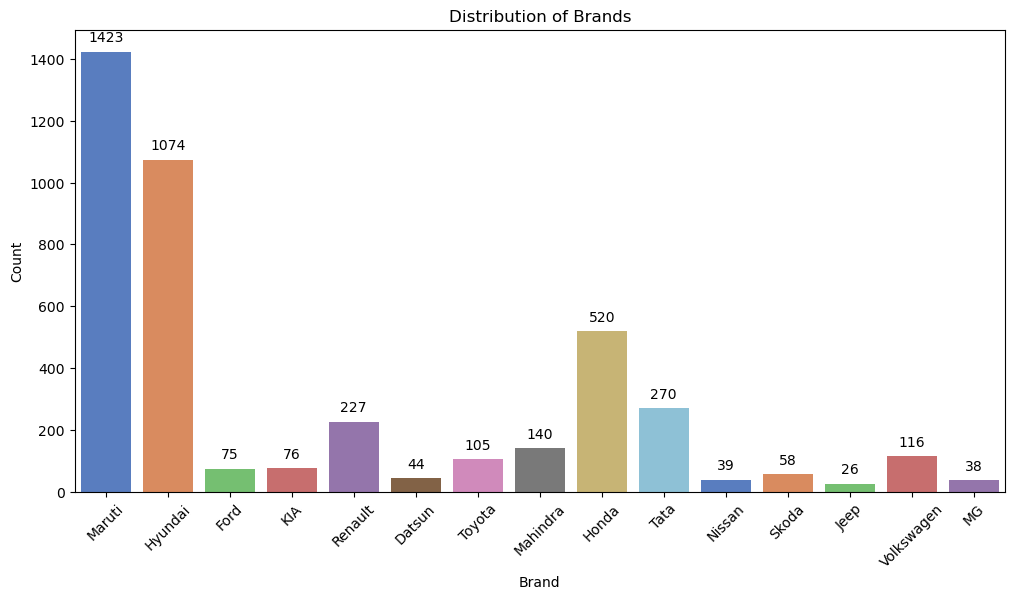

In [81]:
# Create the count plot
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Brand', data=df, palette='muted')

# Add numbers on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

# Labeling and displaying the plot
plt.title('Distribution of Brands')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

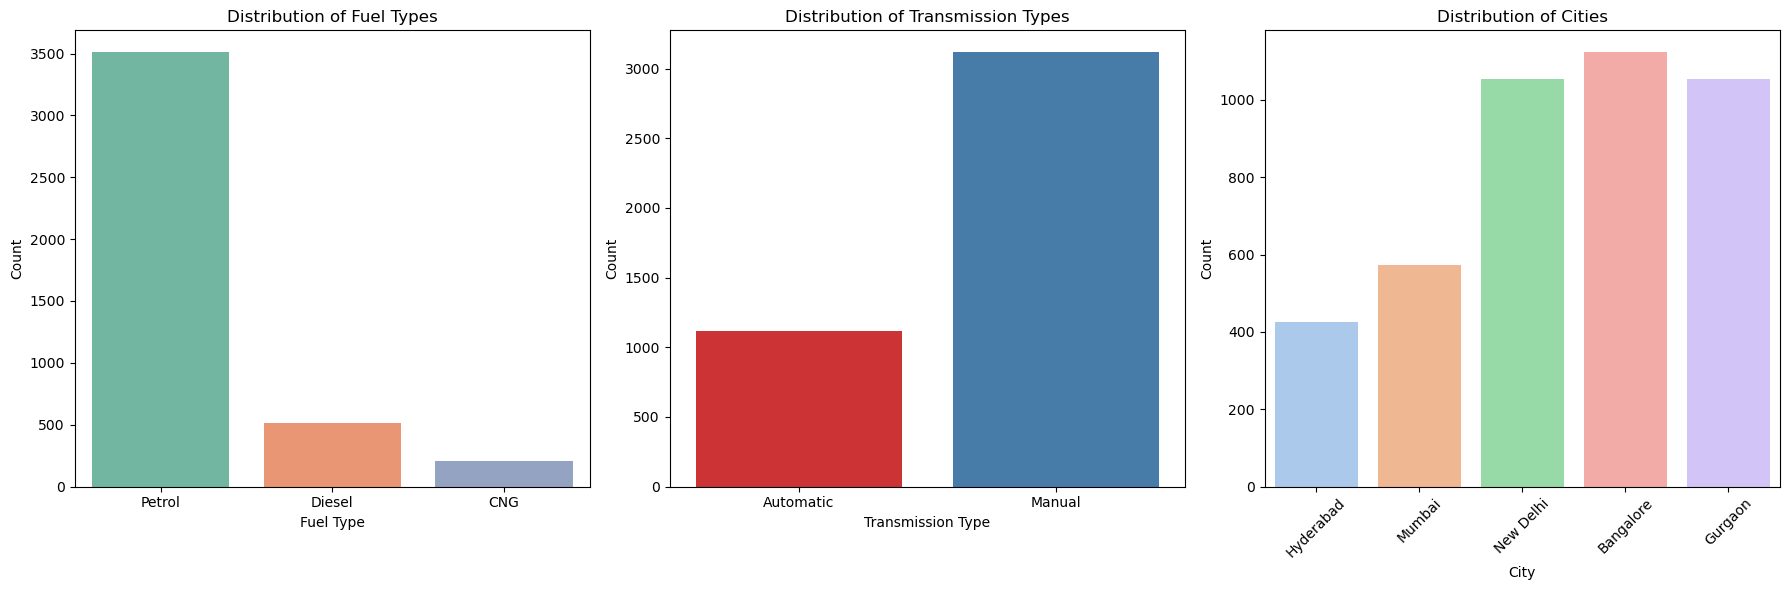

In [82]:

# Create a figure and subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Univariate plot for Fuel_Type
sns.countplot(x='Fuel_Type', data=df, palette='Set2', ax=axes[0])
axes[0].set_title('Distribution of Fuel Types')
axes[0].set_xlabel('Fuel Type')
axes[0].set_ylabel('Count')

# Univariate plot for Transmission_Type
sns.countplot(x='Transmission_Type', data=df, palette='Set1', ax=axes[1])
axes[1].set_title('Distribution of Transmission Types')
axes[1].set_xlabel('Transmission Type')
axes[1].set_ylabel('Count')

# Univariate plot for City
sns.countplot(x='City', data=df, palette='pastel', ax=axes[2])
axes[2].set_title('Distribution of Cities')
axes[2].set_xlabel('City')
axes[2].set_ylabel('Count')
axes[2].tick_params(axis='x', rotation=45)


plt.tight_layout()
plt.show()

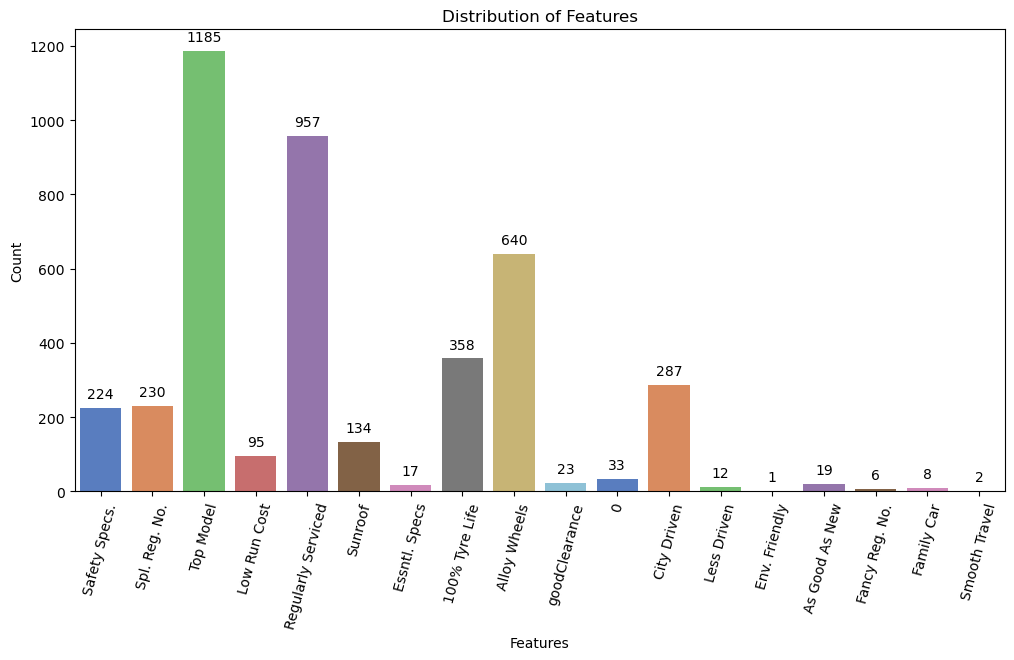

In [87]:
# Create the count plot
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Features', data=df, palette='muted')

# Add numbers on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

# Labeling and displaying the plot
plt.title('Distribution of Features')
plt.xlabel('Features')
plt.ylabel('Count')
plt.xticks(rotation=75)
plt.show()

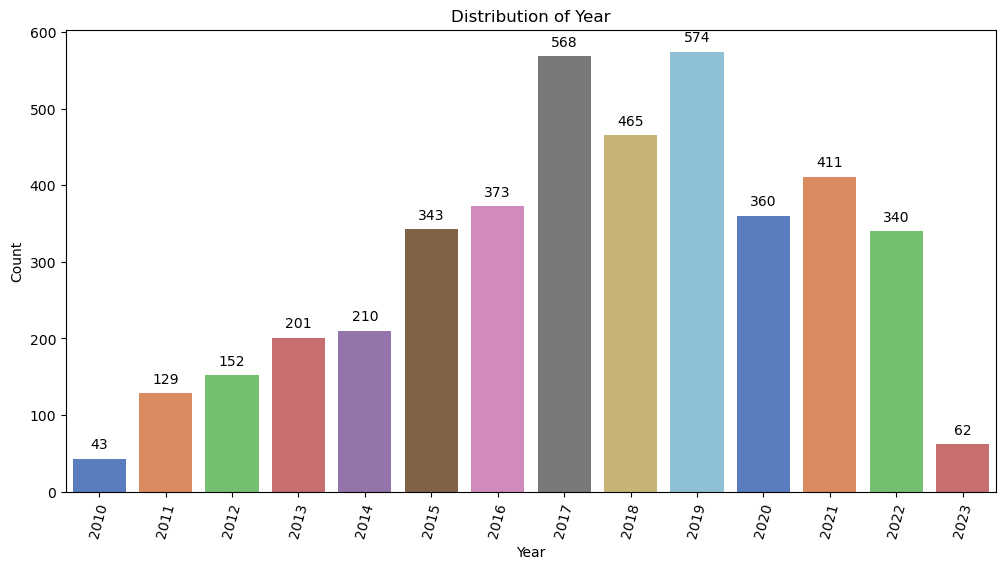

In [89]:
# Create the count plot
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Year', data=df, palette='muted')

# Add numbers on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

# Labeling and displaying the plot
plt.title('Distribution of Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=75)
plt.show()

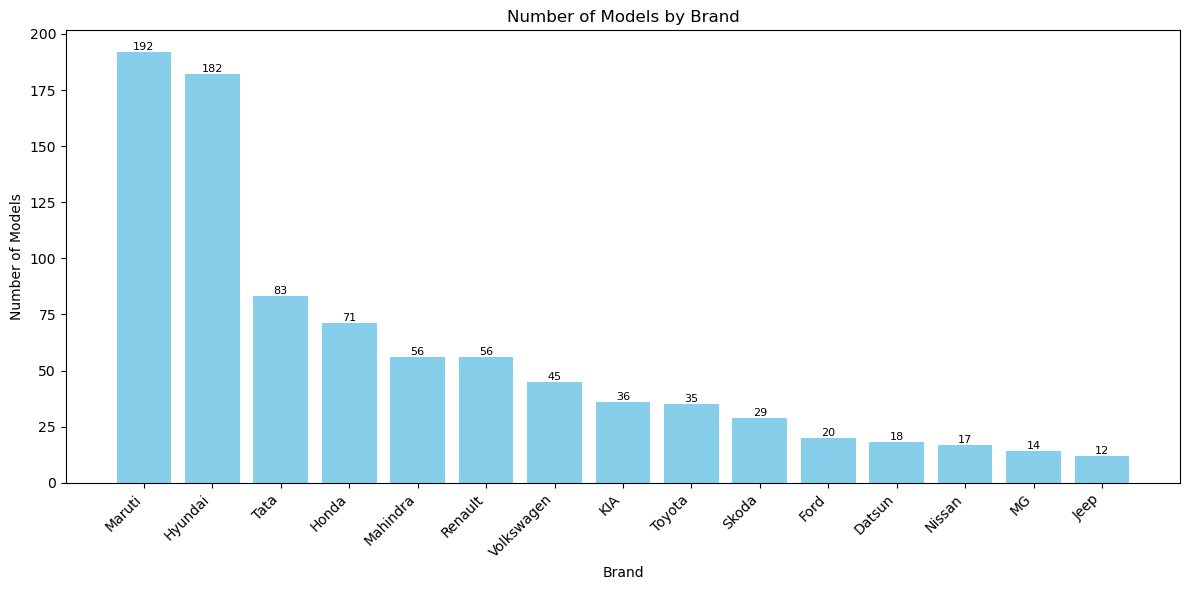

In [84]:


# Provided data
brand_model_count = {
    'Brand': ['Maruti', 'Hyundai', 'Tata', 'Honda', 'Mahindra', 'Renault', 'Volkswagen', 'KIA', 'Toyota', 'Skoda', 'Ford', 'Datsun', 'Nissan', 'MG', 'Jeep'],
    'Model_Count': [192, 182, 83, 71, 56, 56, 45, 36, 35, 29, 20, 18, 17, 14, 12]
}

# Create bar plot
plt.figure(figsize=(12, 6))
bars = plt.bar(brand_model_count['Brand'], brand_model_count['Model_Count'], color='skyblue')

# Add numbers on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center', fontsize=8)

# Labeling and displaying the plot
plt.title('Number of Models by Brand')
plt.xlabel('Brand')
plt.ylabel('Number of Models')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# bi-variate analysis

In [92]:
df.groupby(by="Year")["Price(L)"].agg(['min','max',"mean"])

min    max      mean
Year                       
2010  1.34   3.58  2.091628
2011  1.58   4.53  2.522636
2012  1.81   6.53  3.254079
2013  1.72   7.35  3.538159
2014  1.89  18.49  4.281381
2015  2.25  10.59  4.695918
2016  2.30  11.31  5.257212
2017  2.23  22.83  5.942694
2018  2.24  21.13  6.353720
2019  2.33  26.08  7.249233
2020  3.58  19.16  7.671750
2021  3.22  19.89  8.196569
2022  3.83  23.35  9.355235
2023  4.65  20.68  8.896129

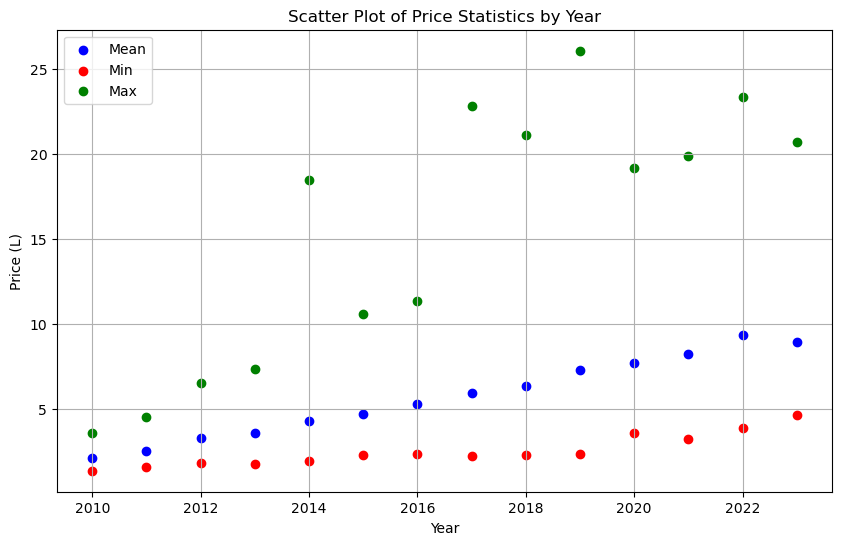

In [93]:
aggregated_data = df.groupby(by="Year")["Price(L)"].agg(['min','max',"mean"]).reset_index()

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(aggregated_data['Year'], aggregated_data['mean'], color='blue', label='Mean')
plt.scatter(aggregated_data['Year'], aggregated_data['min'], color='red', label='Min')
plt.scatter(aggregated_data['Year'], aggregated_data['max'], color='green', label='Max')
plt.title('Scatter Plot of Price Statistics by Year')
plt.xlabel('Year')
plt.ylabel('Price (L)')
plt.legend()
plt.grid(True)
plt.show()

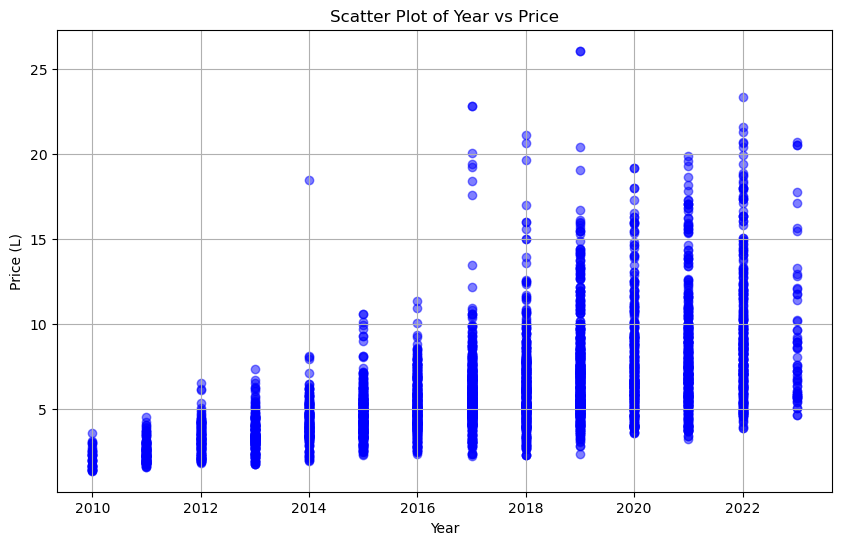

In [90]:
# for year and price

plt.figure(figsize=(10, 6))
plt.scatter(df['Year'], df['Price(L)'], color='blue', alpha=0.5)
plt.title('Scatter Plot of Year vs Price')
plt.xlabel('Year')
plt.ylabel('Price (L)')
plt.grid(True)
plt.show()

In [99]:
# num vs catagarical



In [98]:
import plotly.express as px

fig = px.violin(df, x='Brand', y='Price(L)', title='Price DistributiOn', box=True, points="all", hover_data=df.columns)
fig.update_layout(xaxis=dict(tickangle=45))
fig.show()

# Brand wise Analysis

In [122]:
category_counts = df['Brand'].value_counts()
category_counts

Brand
Maruti        1423
Hyundai       1074
Honda          520
Tata           270
Renault        227
Mahindra       140
Volkswagen     116
Toyota         105
KIA             76
Ford            75
Skoda           58
Datsun          44
Nissan          39
MG              38
Jeep            26
Name: count, dtype: int64

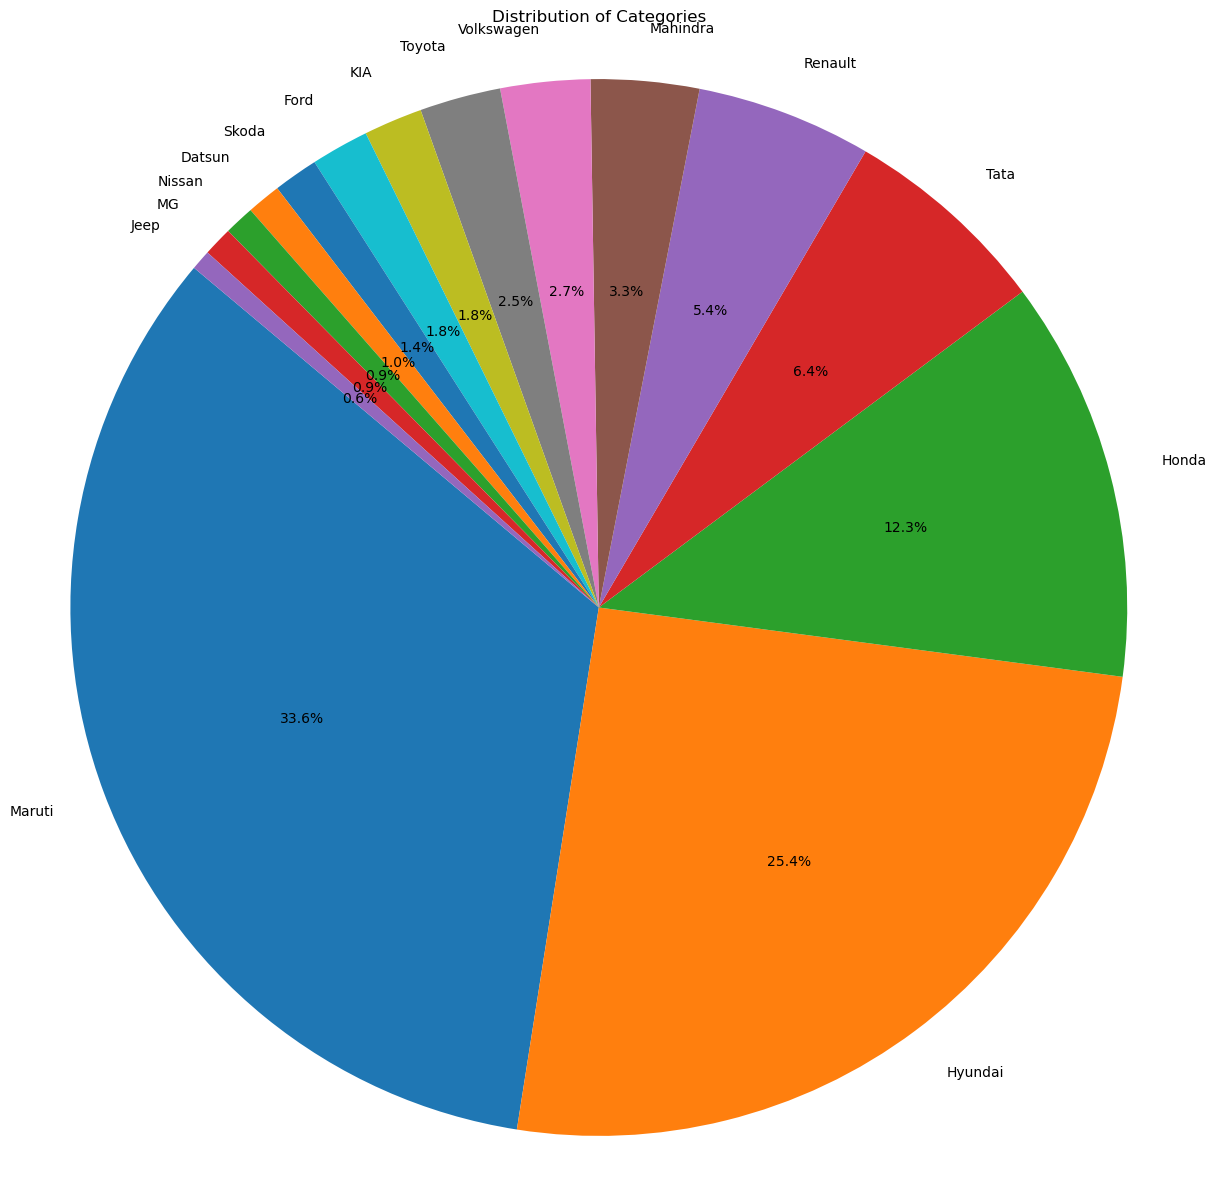

In [121]:

plt.figure(figsize=(15, 15))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal') 
plt.title('Distribution of Categories')
plt.show()

In [132]:
maruti_data = df[df['Brand'] == 'Maruti']

maruti_summary = maruti_data.groupby('Model')['Price(L)'].agg(['min', 'max','mean']).reset_index()
maruti_summary['Features'] = maruti_data.groupby('Model')['Features'].first().values

maruti_summary


Model    min    max       mean            Features
0                   Alto 800 LXI   1.89   3.04   2.451667      100% Tyre Life
1               Alto 800 LXI CNG   1.90   2.81   2.273333        Low Run Cost
2                 Alto 800 LXI O   2.84   2.97   2.905000  Regularly Serviced
3                   Alto 800 VXI   1.97   3.02   2.648182           Top Model
4                 Alto 800 VXI O   2.66   2.66   2.660000  Regularly Serviced
..                           ...    ...    ...        ...                 ...
187                 XL6 ALPHA MT   9.22   9.22   9.220000           Top Model
188  XL6 ALPHA PLUS MT DUAL TONE  12.32  12.32  12.320000           Top Model
189                  XL6 ZETA AT  10.80  13.06  11.553333        Alloy Wheels
190                  XL6 ZETA MT   9.76  10.76  10.093333  Regularly Serviced
191               Zen Estilo VXI   1.91   2.19   2.065000           Top Model

[192 rows x 5 columns]

In [134]:
fig = px.scatter(maruti_summary, x='Features', y=['min', 'max', 'mean'], title='Price vs Features for Maruti Models')
fig.show()


In [125]:
df[(df["Brand"]=="Maruti")]["Features"].unique()

array(['Safety Specs.', 'Low Run Cost', 'Top Model', 'Regularly Serviced',
       'Essntl. Specs', 'Spl. Reg. No.', 'Alloy Wheels', 'City Driven',
       '100% Tyre Life', 'Sunroof', 0, 'Fancy Reg. No.', 'Less Driven',
       'Family Car', 'goodClearance', 'Smooth Travel'], dtype=object)

In [135]:
df[(df["Brand"]=="Maruti")]["Features"].nunique()

16

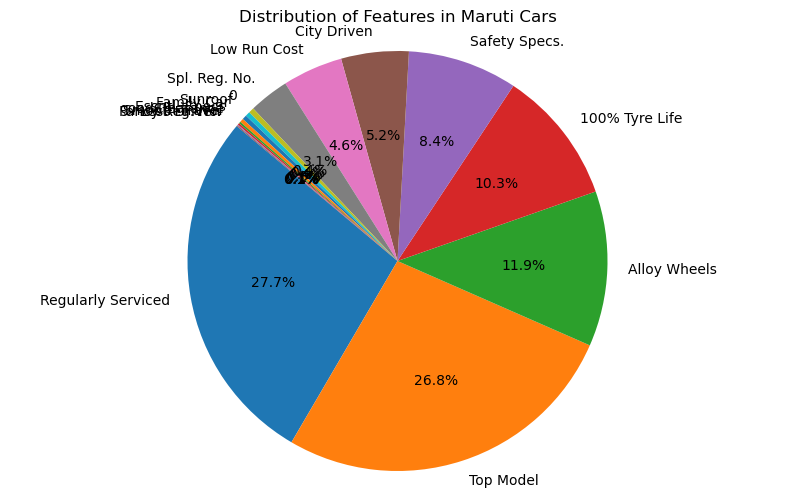

In [127]:
maruti_features_counts = df[df['Brand'] == 'Maruti']['Features'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(maruti_features_counts, labels=maruti_features_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal') 
plt.title('Distribution of Features in Maruti Cars')
plt.show()


In [137]:
Hyundai_data = df[df['Brand'] == 'Hyundai']

Hyundai_summary = Hyundai_data.groupby('Model')['Price(L)'].agg(['min', 'max','mean']).reset_index()
Hyundai_summary['Features'] = Hyundai_data.groupby('Model')['Features'].first().values

Hyundai_summary


Model    min    max       mean  \
0    ALCAZAR 1.5 SIGNATURE (O) AT 6STR  19.89  19.89  19.890000   
1    ALCAZAR 2.0 SIGNATURE (O) AT 6STR  21.30  21.30  21.300000   
2    ALCAZAR 2.0 SIGNATURE (O) AT 7STR  20.64  20.64  20.640000   
3     ALCAZAR PRESTIGE (O) 6STR 2.0 AT  17.81  17.81  17.810000   
4                           AURA S 1.2   6.26   6.26   6.260000   
..                                 ...    ...    ...        ...   
177             i20 MAGNA (O) 1.4 CRDI   3.82   3.84   3.830000   
178                      i20 MAGNA 1.2   2.70   4.14   3.428000   
179                 i20 SPORTZ (O) 1.2   3.53   3.53   3.530000   
180                     i20 SPORTZ 1.2   1.94   5.35   3.592727   
181                i20 SPORTZ 1.4 CRDI   4.19   5.05   4.510000   

               Features  
0             Top Model  
1         Spl. Reg. No.  
2             Top Model  
3               Sunroof  
4    Regularly Serviced  
..                  ...  
177      100% Tyre Life  
178         City Driven  
179        Alloy Wheels  
180        Alloy Wheels  
181        Alloy Wheels  

[182 rows x 5 columns]

In [146]:
fig = px.violin(Hyundai_summary, y='mean', x='Model', box=True, points="all", hover_data=Hyundai_summary.columns,
                title='Distribution of Mean Prices for Hyundai Models')
fig.update_traces(meanline_visible=True)
fig.show()


In [138]:
df[(df["Brand"]=="Hyundai")]["Features"].unique()

array(['Spl. Reg. No.', 'Top Model', 'Regularly Serviced', 'Alloy Wheels',
       'Essntl. Specs', '100% Tyre Life', 'City Driven', 'Low Run Cost',
       'Safety Specs.', 'Less Driven', 'Env. Friendly', 'Sunroof',
       'goodClearance', 0, 'As Good As New'], dtype=object)

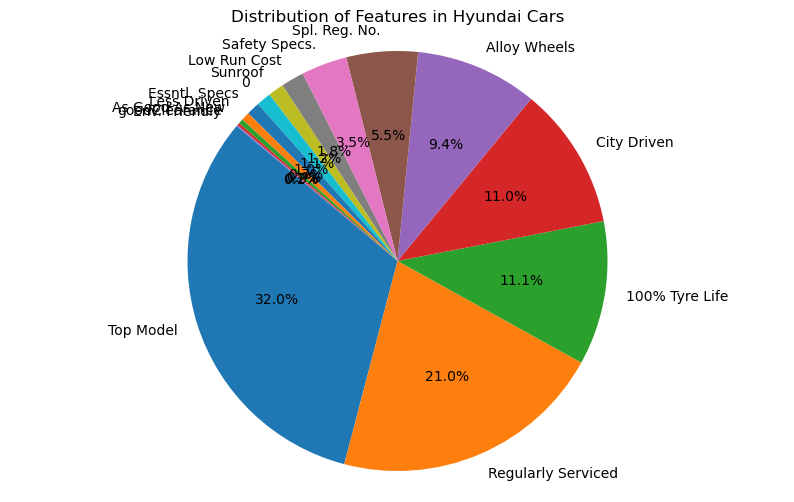

In [147]:
Hyundai_features_counts = df[df['Brand'] == 'Hyundai']['Features'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(Hyundai_features_counts, labels=Hyundai_features_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal') 
plt.title('Distribution of Features in Hyundai Cars')
plt.show()

In [139]:
df[(df["Brand"]=="Hyundai")]["Features"].nunique()

15

In [149]:
Honda_data = df[df['Brand'] == 'Honda']

Honda_summary =  Honda_data.groupby('Model')['Price(L)'].agg(['min', 'max','mean']).reset_index()
Honda_summary['Features'] =  Honda_data.groupby('Model')['Features'].first().values

Honda_summary


Model   min   max      mean            Features
0       Amaze 1.2L I-VTEC E  3.67  4.13  3.900000         City Driven
1      Amaze 1.2L I-VTEC EX  2.90  3.79  3.196667       Spl. Reg. No.
2       Amaze 1.2L I-VTEC S  3.08  7.54  4.997414       Safety Specs.
3   Amaze 1.2L I-VTEC S CVT  7.03  7.54  7.285000  Regularly Serviced
4      Amaze 1.2L I-VTEC SX  3.98  4.20  4.095000  Regularly Serviced
..                      ...   ...   ...       ...                 ...
66    WR-V 1.2L I-VTEC S MT  6.42  6.43  6.423333  Regularly Serviced
67   WR-V 1.2L I-VTEC SV MT  8.71  8.71  8.710000           Top Model
68   WR-V 1.2L I-VTEC VX MT  5.18  8.09  6.866316           Top Model
69    WR-V 1.5L I-DTEC S MT  4.76  4.76  4.760000       Safety Specs.
70   WR-V 1.5L I-DTEC VX MT  5.89  7.64  6.924444           Top Model

[71 rows x 5 columns]

In [151]:
fig = px.scatter(Honda_summary, x='mean', y='max', color='min', size='min', hover_data=['Model', 'Features'],
                 title='Comparison of Prices for Honda Models')
fig.update_traces(marker=dict(size=12, line=dict(width=2, color='DarkSlateGrey')), selector=dict(mode='markers'))
fig.show()


In [152]:
df[(df["Brand"]=="Honda")]["Features"].unique()

array(['Spl. Reg. No.', 'Alloy Wheels', 'Top Model', 0, 'City Driven',
       'Safety Specs.', '100% Tyre Life', 'Sunroof', 'Regularly Serviced',
       'As Good As New'], dtype=object)

In [153]:
df[(df["Brand"]=="Honda")]["Features"].nunique()

10

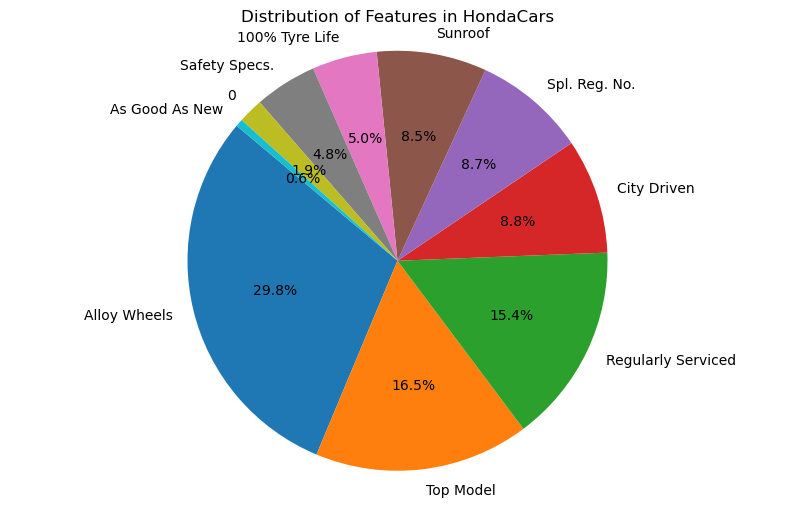

In [154]:
Honda_features_counts = df[df['Brand'] == 'Honda']['Features'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(Honda_features_counts, labels=Honda_features_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal') 
plt.title('Distribution of Features in HondaCars')
plt.show()

In [123]:
df.head()

Year    Brand                               Model  Driven_Kms Fuel_Type  \
0  2018   Maruti                       Dzire VXI AMT       43091    Petrol   
1  2019  Hyundai               NEW SANTRO SPORTZ AMT       25159    Petrol   
2  2020     Ford  Ecosport TITANIUM + 1.5L PETROL AT       10885    Petrol   
3  2016   Maruti                     Celerio VXI AMT       53167    Petrol   
4  2015  Hyundai       Grand i10 ASTA 1.2 KAPPA VTVT       42198    Petrol   

  Transmission_Type       Features       City  Price(L)  EMI(month)  
0         Automatic  Safety Specs.  Hyderabad      6.16       12043  
1         Automatic  Spl. Reg. No.  Hyderabad      5.35       10459  
2         Automatic      Top Model  Hyderabad     10.08       19186  
3         Automatic   Low Run Cost  Hyderabad      4.13        8074  
4            Manual      Top Model  Hyderabad      4.51        8817

# Cars Analysis on City Wise

In [102]:
city_hyd = df[(df["City"]=="Hyderabad")]["Brand"].value_counts()
city_hyd

Brand
Maruti        137
Hyundai       118
Honda          49
Tata           26
Renault        25
Ford            9
KIA             9
Datsun          9
Volkswagen      9
Mahindra        8
Toyota          7
Nissan          6
MG              5
Skoda           4
Jeep            4
Name: count, dtype: int64

In [103]:
city_bngl = df[(df["City"]=="Bangalore")]["Brand"].value_counts()
city_bngl

Brand
Maruti        343
Hyundai       330
Honda         114
Renault        92
Tata           44
Mahindra       42
Volkswagen     32
Skoda          28
Toyota         25
KIA            24
MG             15
Datsun         12
Ford           10
Nissan          8
Jeep            5
Name: count, dtype: int64

In [104]:
city_mi = df[(df["City"]=="Mumbai")]["Brand"].value_counts()
city_mi

Brand
Maruti        221
Hyundai       126
Honda          67
Tata           34
Volkswagen     27
Renault        24
Ford           18
Toyota         17
Mahindra       12
Jeep            7
Skoda           6
KIA             5
MG              4
Datsun          3
Nissan          3
Name: count, dtype: int64

In [105]:
city_new = df[(df["City"]=="New Delhi")]["Brand"].value_counts()
city_new

Brand
Maruti        361
Hyundai       250
Honda         145
Tata           83
Renault        43
Mahindra       39
Toyota         28
Volkswagen     24
KIA            19
Ford           19
Nissan         11
Datsun         10
Skoda          10
MG              7
Jeep            5
Name: count, dtype: int64

In [106]:
city_gurgan = df[(df["City"]=="Gurgaon")]["Brand"].value_counts()
city_gurgan

Brand
Maruti        361
Hyundai       250
Honda         145
Tata           83
Renault        43
Mahindra       39
Toyota         28
Volkswagen     24
KIA            19
Ford           19
Nissan         11
Skoda          10
Datsun         10
MG              7
Jeep            5
Name: count, dtype: int64

In [108]:
cross_tab = pd.crosstab(df['City'], df['Brand'])

cross_tab

Brand      Datsun  Ford  Honda  Hyundai  Jeep  KIA  MG  Mahindra  Maruti  \
City                                                                       
Bangalore      12    10    114      330     5   24  15        42     343   
Gurgaon        10    19    145      250     5   19   7        39     361   
Hyderabad       9     9     49      118     4    9   5         8     137   
Mumbai          3    18     67      126     7    5   4        12     221   
New Delhi      10    19    145      250     5   19   7        39     361   

Brand      Nissan  Renault  Skoda  Tata  Toyota  Volkswagen  
City                                                         
Bangalore       8       92     28    44      25          32  
Gurgaon        11       43     10    83      28          24  
Hyderabad       6       25      4    26       7           9  
Mumbai          3       24      6    34      17          27  
New Delhi      11       43     10    83      28          24

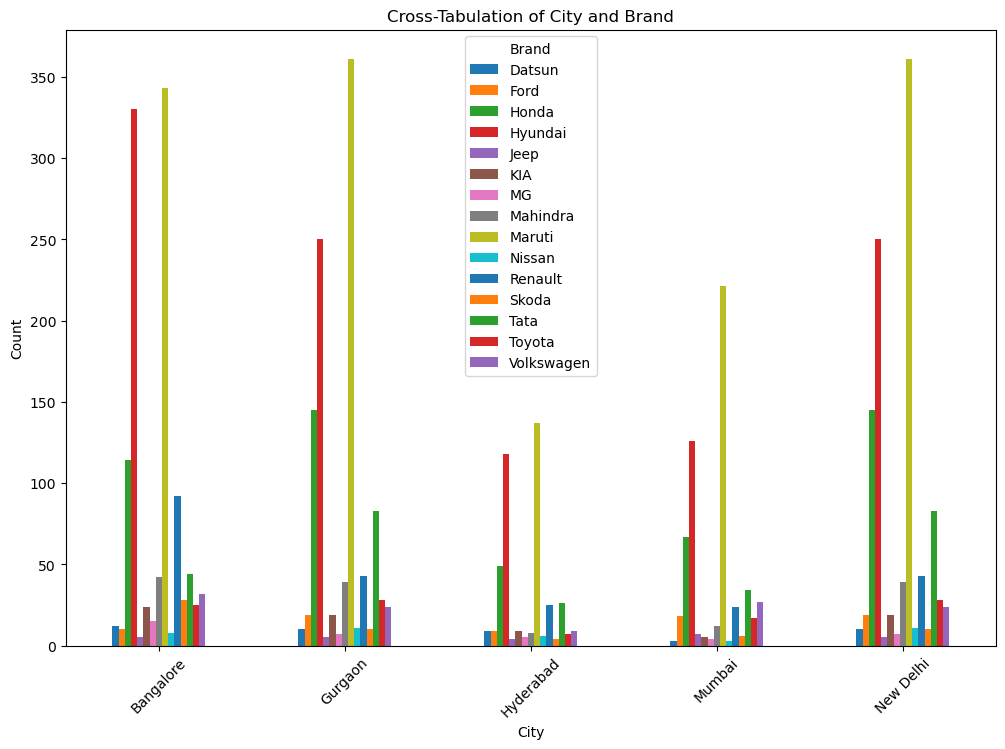

In [116]:
#Clustered Bar Chart:

cross_tab.plot(kind='bar', figsize=(12, 8))
plt.title('Cross-Tabulation of City and Brand')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Brand')
plt.show()


In [119]:
fig = px.funnel(df, x='Brand', y='Price(L)', color='City')
fig.update_layout(title='Cross-Tabulation of City and Brand')
fig.show()
